In [1]:
%matplotlib inline
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
import cPickle

plt.style.use(['ggplot', 'ggplot_mod.mplstyle'])

In [4]:
# Load from the pickle file
f = open("agn_lightcurves.pkl")
AGN_lc, AGN_truth = cPickle.load(f)
f.close()

In [5]:
first_agn = AGN_lc[AGN_lc.keys()[0]]
print("Bands:", first_agn.keys())
print("Fields: ", first_agn['i'].keys())

Bands: ['i', 'r', 'u', 'z', 'g']
Fields:  ['mjd', 'mag', 'error']


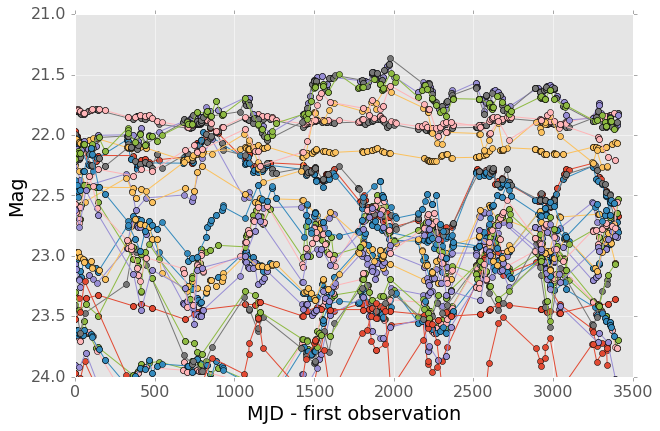

In [12]:
for id in AGN_lc.keys()[:40]:
    first_agn = AGN_lc[id]
    for band, band_data in first_agn.items():
        if len(band_data['mjd']) == 0:
            continue
            
        if np.median(band_data['mag']) > 26:
            continue

        plt.plot(band_data['mjd'] - min(band_data['mjd']),
                 band_data['mag'], 'o-')

plt.axhline(24.5, ls='--', color='k')
plt.xlim(xmin=-3)
plt.ylim(ymax=24)
plt.gca().invert_yaxis()
plt.ylabel("Mag")
plt.xlabel("MJD - first observation")